In [2]:
# Fig0020, Corresponds to Fig. 1 and S1

from mylib.statistic_test import *
from matplotlib.gridspec import GridSpec

code_id = '0020 - Learning Curve'
loc = os.path.join(figpath, code_id)
mkdir(loc)
pass

        E:\Data\FinalResults\0020 - Learning Curve is already existed!


# Lap-wise Time

  0%|          | 0/728 [00:00<?, ?it/s]

100%|██████████| 728/728 [00:02<00:00, 256.20it/s] 


8041


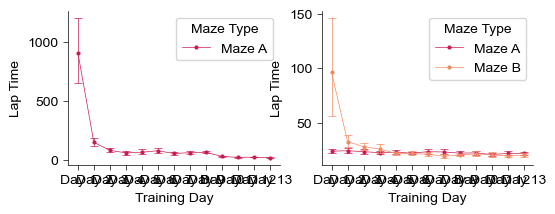

In [ ]:
# Generate Data for Plotting. Data will also be saved as an excel file.
if os.path.exists(join(figdata, f'{code_id} [Time].pkl')) == False:
    TimeData = {
        "MiceID": [],
        "Stage": [],
        "Maze Type": [],
        'Training Day': [],
        "Lap": [],
        "Lap Time": [],
        "Mean Speed": []
    }
    for i in tqdm(range(len(f1))):
        # Only analyze Maze A (1) and B (2) and several mice. 
        # Behavioral paradigm of other mice are not exactly the same as these mice.
        if f1['maze_type'][i] == 0 or f1['MiceID'][i] not in [10209, 10212, 10224, 10227, 10232, 10234]:
            continue 
        
        with open(join(f1['Trace Behav File'][i]), 'rb') as handle:
            trace = pickle.load(handle)
            
        beg, end = LapSplit(trace, trace['paradigm'])

        for j in range(len(beg)):
        
        maze_type = 'Maze A' if f1['maze_type'][i] == 1 else 'Maze B'
        TimeData['MiceID'].append(int(f1['MiceID'][i]))
        TimeData['Stage'].append(f1['Stage'][i])
        TimeData['Training Day'].append(f1['training_day'][i])
        TimeData['Maze Type'].append(maze_type)
        TimeData['Lap'].append(j)
        t = (trace['correct_time'][end[j]] - trace['correct_time'][beg[j]])/1000
        TimeData['Lap Time'].append(t)  # Convert to seconds
            
        dp = np.diff(trace['correct_pos'][beg[j]:end[j]+1, :], axis=0)/10
        l = np.sum(np.sqrt(np.sum(dp**2, axis=1))) # Lap Distance
        speed = l / t  # Speed in cm/s
        TimeData['Mean Speed'].append(speed)
        
    for key in TimeData.keys():
        TimeData[key] = np.array(TimeData[key])
            
    with open(join(figdata, f'{code_id} [Time].pkl'), 'wb') as handle:
        pickle.dump(TimeData, handle)
    
    TimeD = pd.DataFrame(TimeData)
    TimeD.to_excel(join(figdata, f'{code_id} [Time].xlsx'), index=False)
    print(len(TimeD))
else:
    with open(join(figdata, f'{code_id} [Time].pkl'), 'rb') as handle:
            TimeData = pickle.load(handle)

stage1_data = SubDict(
    TimeData,
    TimeData.keys(),
    np.where(TimeData['Stage'] == 'Stage 1')[0]
)
stage2_data = SubDict(
    TimeData,
    TimeData.keys(),
    np.where(TimeData['Stage'] == 'Stage 2')[0]
)

# Adjust Figure Size
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(6, 2)) # Create 2 figures with 2 columns and 1 row. total size (Width: 6, Height: 2)
ax1 = Clear_Axes(axes[0], close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
# Stage 1 SubFigure
sns.lineplot(
    x = 'Training Day',
    y = 'Lap Time',
    hue = 'Maze Type',
    data = stage1_data,
    palette = [MazePalette[1]],
    ax=ax1,
    linewidth=0.5,
    err_style='bars',
    err_kws={'capsize': 3, 'linewidth': 0.5, 'capthick': 0.5},
    marker='o', # Marker. It can be erased if not needed.
    markersize=3,
    markeredgewidth=0 # If you want to use markers, set markeredgewidth to 0 and adjust markersize to ajust its size.
)
# Stage 2 SubFigure
ax2 = Clear_Axes(axes[1], close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.lineplot(
    x = 'Training Day',
    y = 'Lap Time',
    hue = 'Maze Type',
    data = stage2_data,
    palette = [MazePalette[1], MazePalette[2]],
    ax=ax2,
    linewidth=0.5,
    err_style='bars',
    err_kws={'capsize': 3, 'linewidth': 0.5, 'capthick': 0.5},
    marker='o', # Marker. It can be erased if not needed.
    markersize=3,
    markeredgewidth=0 # If you want to use markers, set markeredgewidth to 0 and adjust markersize to ajust its size.
)
plt.savefig(join(loc, "Lap-wise Time.png"), dpi=600)
plt.savefig(join(loc, "Lap-wise Time.svg"), dpi=600)
plt.show()

C:\Users\12454\AppData\Local\Temp\ipykernel_12996\3789351652.py:41: RuntimeWarning: Mean of empty slice
  mean_m1 = np.nanmean(Time3D_Maze1, axis=2)


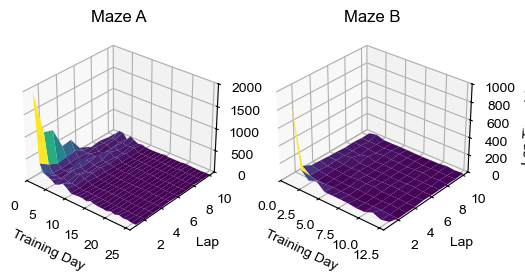

In [ ]:
# Plot a lap-session Conjuctive 3D figure
if exists(join(figdata, f'{code_id} [Time 3D].pkl')) == False:
    with open(join(figdata, f'{code_id} [Time].pkl'), 'rb') as handle:
        TimeData = pickle.load(handle)
    
    Time3D_Maze1 = np.zeros((26, 10, 6)) * np.nan 
    Time3D_Maze2 = np.zeros((13, 10, 6)) * np.nan 
    for m, mouse in tqdm(enumerate([10209, 10212, 10224, 10227, 10232, 10234])):
        for stage in range(2):
            for day in range(13):
                for lap in range(10):
                    idx = np.where(
                        (TimeData['MiceID'] == mouse) &
                        (TimeData['Stage'] == f'Stage {stage + 1}') &
                        (TimeData['Training Day'] == f"Day {day + 1}") &
                        (TimeData['Lap'] == lap) & 
                        (TimeData['Maze Type'] == 'Maze A')
                    )[0]
                    
                    if len(idx) == 1:
                        Time3D_Maze1[stage*13 + day, lap, m] = TimeData['Lap Time'][idx[0]]
                    
                    if stage == 1:
                        idx = np.where(
                            (TimeData['MiceID'] == mouse) &
                            (TimeData['Stage'] == f'Stage {stage + 1}') &
                            (TimeData['Training Day'] == f"Day {day + 1}") &
                            (TimeData['Lap'] == lap) & 
                            (TimeData['Maze Type'] == 'Maze B')
                        )[0]
                        
                        if len(idx) == 1:
                            Time3D_Maze2[day, lap, m] = TimeData['Lap Time'][idx[0]]
                    
    with open(join(figdata, f'{code_id} [Time 3D].pkl'), 'wb') as handle:
        pickle.dump([Time3D_Maze1, Time3D_Maze2], handle)
else:
    with open(join(figdata, f'{code_id} [Time 3D].pkl'), 'rb') as handle:
        Time3D_Maze1, Time3D_Maze2 = pickle.load(handle)

mean_m1 = np.nanmean(Time3D_Maze1, axis=2)
mean_m2 = np.nanmean(Time3D_Maze2, axis=2)

S1, L1 = np.meshgrid(
    np.arange(1, 27),  # Training Days
    np.arange(1, 11)   # Laps
)
S2, L2 = np.meshgrid(
    np.arange(1, 14),  # Training Days
    np.arange(1, 11)   # Laps
)
# gaussian filter to smooth the surface
from scipy.ndimage import gaussian_filter
#mean_m1 = gaussian_filter(mean_m1, sigma=0.5)
#mean_m2 = gaussian_filter(mean_m2, sigma=0.5)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(6, 3), subplot_kw={'projection': '3d'})
ax = axes[0]
ax.plot_surface(
    S1, L1,
    mean_m1.T, 
    cmap='viridis', 
    edgecolor='none'
)
ax.set_xlabel('Training Day')
ax.set_ylabel('Lap')
ax.set_zlabel('Lap Time (s)')
ax.set_title('Maze A')
ax.view_init(30, -50)  
ax.set_zlim(0, 2000)
ax.set_xlim(0, 26)

ax = axes[1]
ax.plot_surface(
    S2, L2,
    mean_m2.T, 
    cmap='viridis', 
    edgecolor='none'
)
ax.set_xlabel('Training Day')
ax.set_ylabel('Lap')
ax.set_zlabel('Lap Time (s)')
ax.set_title('Maze B')
ax.view_init(30, -50)  
ax.set_zlim(0, 1000)
ax.set_xlim(0, 13)
plt.savefig(join(loc, "Lap-wise Time 3D.png"), dpi=600)
plt.savefig(join(loc, "Lap-wise Time 3D.svg"), dpi=600)
plt.show()

# Lap-wise Speed

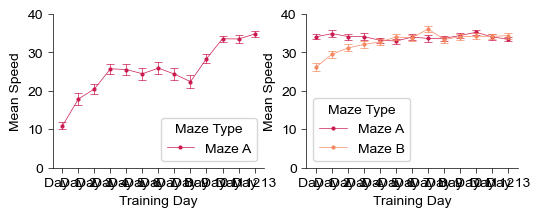

In [ ]:
stage1_data = SubDict(
    TimeData,
    TimeData.keys(),
    np.where(TimeData['Stage'] == 'Stage 1')[0]
)
stage2_data = SubDict(
    TimeData,
    TimeData.keys(),
    np.where(TimeData['Stage'] == 'Stage 2')[0]
)

# Adjust Figure Size
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(6, 2)) # Create 2 figures with 2 columns and 1 row. total size (Width: 6, Height: 2)
ax1 = Clear_Axes(axes[0], close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
# Stage 1 SubFigure
sns.lineplot(
    x = 'Training Day',
    y = 'Mean Speed',
    hue = 'Maze Type',
    data = stage1_data,
    palette = [MazePalette[1]],
    ax=ax1,
    linewidth=0.5,
    err_style='bars',
    err_kws={'capsize': 3, 'linewidth': 0.5, 'capthick': 0.5},
    marker='o', # Marker. It can be erased if not needed.
    markersize=3,
    markeredgewidth=0 # If you want to use markers, set markeredgewidth to 0 and adjust markersize to ajust its size.
)
# Stage 2 SubFigure
ax2 = Clear_Axes(axes[1], close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.lineplot(
    x = 'Training Day',
    y = 'Mean Speed',
    hue = 'Maze Type',
    data = stage2_data,
    palette = [MazePalette[1], MazePalette[2]],
    ax=ax2,
    linewidth=0.5,
    err_style='bars',
    err_kws={'capsize': 3, 'linewidth': 0.5, 'capthick': 0.5},
    marker='o', # Marker. It can be erased if not needed.
    markersize=3,
    markeredgewidth=0 # If you want to use markers, set markeredgewidth to 0 and adjust markersize to ajust its size.
)
ax1.set_ylim(0, 40)
ax2.set_ylim(0, 40)
plt.savefig(join(loc, "Lap-wise Speed.png"), dpi=600)
plt.savefig(join(loc, "Lap-wise Speed.svg"), dpi=600)
plt.show()

# Correct Spatial Decisions

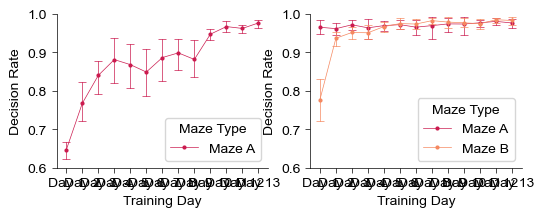

In [26]:
if exists(join(figdata, f'{code_id} [Spatial Decisions].pkl')) == False:
    DecisionRate = {
        "MiceID": [],
        "Stage": [],
        "Maze Type": [],
        'Training Day': [],
        "Decision Rate": []
    }
    
    for i in tqdm(range(len(f1))):
        if f1['maze_type'][i] == 0 or f1['MiceID'][i] not in [10209, 10212, 10224, 10227, 10232, 10234]:
            continue 
        
        with open(join(f1['Trace Behav File'][i]), 'rb') as handle:
            trace = pickle.load(handle)
            
        err_num, pass_num, std_err = calc_behavioral_score(trace)
        
        DecisionRate['MiceID'].append(int(f1['MiceID'][i]))
        DecisionRate['Stage'].append(f1['Stage'][i])
        DecisionRate['Training Day'].append(f1['training_day'][i])
        DecisionRate['Maze Type'].append('Maze A' if f1['maze_type'][i] == 1 else 'Maze B')
        DecisionRate['Decision Rate'].append(1 - err_num / (err_num + pass_num))
        
    for key in DecisionRate.keys():
        DecisionRate[key] = np.array(DecisionRate[key])
        
    with open(join(figdata, f'{code_id} [Spatial Decisions].pkl'), 'wb') as handle:
        pickle.dump(DecisionRate, handle)
    
    DecisionRateD = pd.DataFrame(DecisionRate)
    DecisionRateD.to_excel(join(figdata, f'{code_id} [Spatial Decisions].xlsx'), index=False)
    print(len(DecisionRateD))
else:
    with open(join(figdata, f'{code_id} [Spatial Decisions].pkl'), 'rb') as handle:
        DecisionRate = pickle.load(handle)

stage1_data = SubDict(
    DecisionRate,
    DecisionRate.keys(),
    np.where(DecisionRate['Stage'] == 'Stage 1')[0]
)
stage2_data = SubDict(
    DecisionRate,
    DecisionRate.keys(),
    np.where(DecisionRate['Stage'] == 'Stage 2')[0]
)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(6, 2)) # Create 2 figures with 2 columns and 1 row. total size (Width: 6, Height: 2)
ax1 = Clear_Axes(axes[0], close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
# Stage 1 SubFigure
sns.lineplot(
    x = 'Training Day',
    y = 'Decision Rate',
    hue = 'Maze Type',
    data = stage1_data,
    palette = [MazePalette[1]],
    ax=ax1,
    linewidth=0.5,
    err_style='bars',
    err_kws={'capsize': 3, 'linewidth': 0.5, 'capthick': 0.5},
    marker='o', # Marker. It can be erased if not needed.
    markersize=3,
    markeredgewidth=0 # If you want to use markers, set markeredgewidth to 0 and adjust markersize to ajust its size.
)
# Stage 2 SubFigure
ax2 = Clear_Axes(axes[1], close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.lineplot(
    x = 'Training Day',
    y = 'Decision Rate',
    hue = 'Maze Type',
    data = stage2_data,
    palette = [MazePalette[1], MazePalette[2]],
    ax=ax2,
    linewidth=0.5,
    err_style='bars',
    err_kws={'capsize': 3, 'linewidth': 0.5, 'capthick': 0.5},
    marker='o', # Marker. It can be erased if not needed.
    markersize=3,
    markeredgewidth=0 # If you want to use markers, set markeredgewidth to 0 and adjust markersize to ajust its size.
)
ax1.set_ylim(0.6, 1)
ax2.set_ylim(0.6, 1)
plt.savefig(join(loc, "Correct Spatial Decisions.png"), dpi=600)
plt.savefig(join(loc, "Correct Spatial Decisions.svg"), dpi=600)
plt.show()

# Behavioral Progress

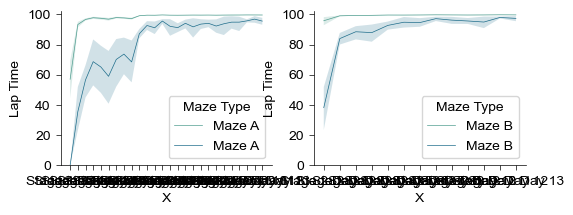

In [67]:
with open(join(figdata, f'{code_id} [Time].pkl'), 'rb') as handle:
    TimeData = pickle.load(handle)
with open(join(figdata, f'{code_id} [Spatial Decisions].pkl'), 'rb') as handle:
    DecisionRate = pickle.load(handle)
    
for mouse in [10209, 10212, 10224, 10227, 10232, 10234]:
    idx = np.where(TimeData['MiceID'] == mouse)[0]
    tmin, tmax = np.min(TimeData['Lap Time'][idx]), np.max(TimeData['Lap Time'][idx])
    TimeData['Lap Time'][idx] = (tmax - TimeData['Lap Time'][idx]) / (tmax - tmin) * 100  # Normalize to 0-100%
    
    vmin, vmax = np.min(TimeData['Mean Speed'][idx]), np.max(TimeData['Mean Speed'][idx])
    TimeData['Mean Speed'][idx] = (TimeData['Mean Speed'][idx] - vmin) / (vmax - vmin) * 100  # Normalize to 0-100%
    
    idx = np.where(DecisionRate['MiceID'] == mouse)[0]
    dmin, dmax = np.min(DecisionRate['Decision Rate'][idx]), np.max(DecisionRate['Decision Rate'][idx])
    DecisionRate['Decision Rate'][idx] = (DecisionRate['Decision Rate'][idx] - dmin) / (dmax - dmin) * 100  # Normalize to 0-100%

TimeData['X'] = np.array([f"{TimeData['Stage'][i]} {TimeData['Training Day'][i]}" for i in range(len(TimeData['Stage']))])
DecisionRate['X'] = np.array([f"{DecisionRate['Stage'][i]} {DecisionRate['Training Day'][i]}" for i in range(len(DecisionRate['Stage']))])

maze_a_time = SubDict(
    TimeData,
    TimeData.keys(),
    np.where(TimeData['Maze Type'] == 'Maze A')[0]
)
maze_b_time = SubDict(
    TimeData,
    TimeData.keys(),
    np.where(TimeData['Maze Type'] == 'Maze B')[0]
)
maze_a_decision = SubDict(
    DecisionRate,
    DecisionRate.keys(),
    np.where(DecisionRate['Maze Type'] == 'Maze A')[0]
)
maze_b_decision = SubDict(
    DecisionRate,
    DecisionRate.keys(),
    np.where(DecisionRate['Maze Type'] == 'Maze B')[0]
)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(6, 2))
ax1 = Clear_Axes(axes[0], close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
data = [maze_a_time, maze_a_decision]
key = ['Lap Time', 'Decision Rate']
colors = sns.color_palette('crest', 2)
for i, d in enumerate(data):
    sns.lineplot(
        x = 'X',
        y = key[i],
        hue = 'Maze Type',
        data = d,
        palette = [colors[i]],
        ax=ax1,
        linewidth=0.5,
        err_kws={'edgecolor': None}
        #err_style='bars',
        #err_kws={'capsize': 3, 'linewidth': 0.5, 'capthick': 0.5},
        #marker='o', # Marker. It can be erased if not needed.
        #markersize=3,
        #markeredgewidth=0 # If you want to use markers, set markeredgewidth to 0 and adjust markersize to ajust its size.
    )
    
ax1.set_ylim(0, 102)
ax1.set_yticks(np.linspace(0, 100, 6))

ax2 = Clear_Axes(axes[1], close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
data = [maze_b_time, maze_b_decision]
key = ['Lap Time', 'Decision Rate']
for i, d in enumerate(data):
    sns.lineplot(
        x = 'X',
        y = key[i],
        hue = 'Maze Type',
        data = d,
        palette = [colors[i]],
        ax=ax2,
        linewidth=0.5,
        err_kws={'edgecolor': None}
        #err_style='bars',
        #err_kws={'capsize': 3, 'linewidth': 0.5, 'capthick': 0.5},
        #marker='o', # Marker. It can be erased if not needed.
        #markersize=3,
        #markeredgewidth=0 # If you want to use markers, set markeredgewidth to 0 and adjust markersize to ajust its size.
    )
ax2.set_ylim(0, 102)
ax2.set_yticks(np.linspace(0, 100, 6))
plt.savefig(join(loc, "Behavioral Progress.png"), dpi=600)
plt.savefig(join(loc, "Behavioral Progress.svg"), dpi=600)
plt.show()